In [1]:
import wandb
import pandas as pd

api = wandb.Api()

run = api.run("algue/ICLR_Cifar10/ye5mlfrv")
summary = run.summary_metrics
pd.DataFrame(summary).transpose().head()

,_type,bins,values,sha256,path,size
val_certacc_4,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
_timestamp,1695985453.405793,1695985453.405793,1695985453.405793,1695985453.405793,1695985453.405793,1695985453.405793
gradient_bounds_dp__quick_spectral_dense/kernel:0,4.242641,4.242641,4.242641,4.242641,4.242641,4.242641
certacc_2,0.01618,0.01618,0.01618,0.01618,0.01618,0.01618
certacc_4,0.00008,0.00008,0.00008,0.00008,0.00008,0.00008


<Axes: ylabel='2'>

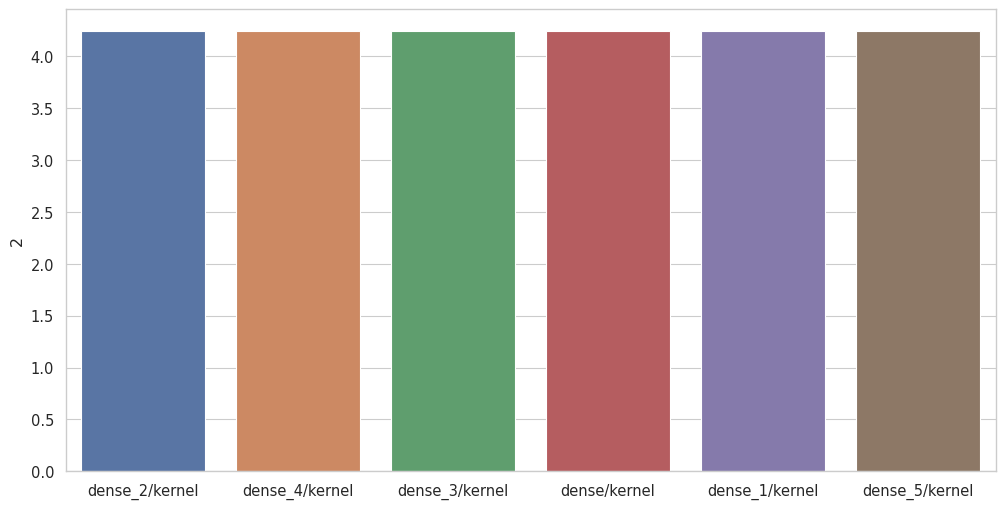

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

history = run.history(samples=1000)
df = pd.DataFrame(history)
cols = df.columns.tolist()
ratios_col = [col for col in cols if 'ratio' in col]
bound_cols = [col for col in cols if 'bound' in col]
norm_cols = [col for col in cols if 'norm' in col]
df_ratios = df[ratios_col].dropna(axis=0, how='any')
df_ratios = df_ratios.rename(columns=lambda x: x.replace('ratios_', ''))
df_bounds = df[bound_cols].dropna(axis=0, how='any')
df_bounds = df_bounds.rename(columns=lambda x: x.replace('gradient_bounds_', ''))
df_norms = df[norm_cols].dropna(axis=0, how='any')
df_norms = df_norms.rename(columns=lambda x: x.replace('norms_', ''))
remove_prefix = lambda x: x.replace('dp__quick_spectral_', '')
df_ratios = df_ratios.rename(columns=remove_prefix)
df_bounds = df_bounds.rename(columns=remove_prefix)
df_norms = df_norms.rename(columns=remove_prefix)
remove_trailing_zero = lambda x: x.replace(':0', '')
df_ratios = df_ratios.rename(columns=remove_trailing_zero)
df_bounds = df_bounds.rename(columns=remove_trailing_zero)
df_norms = df_norms.rename(columns=remove_trailing_zero)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.2)
sns.barplot(x=df_bounds.columns, y=df_bounds.iloc[0])

<Figure size 1200x600 with 0 Axes>

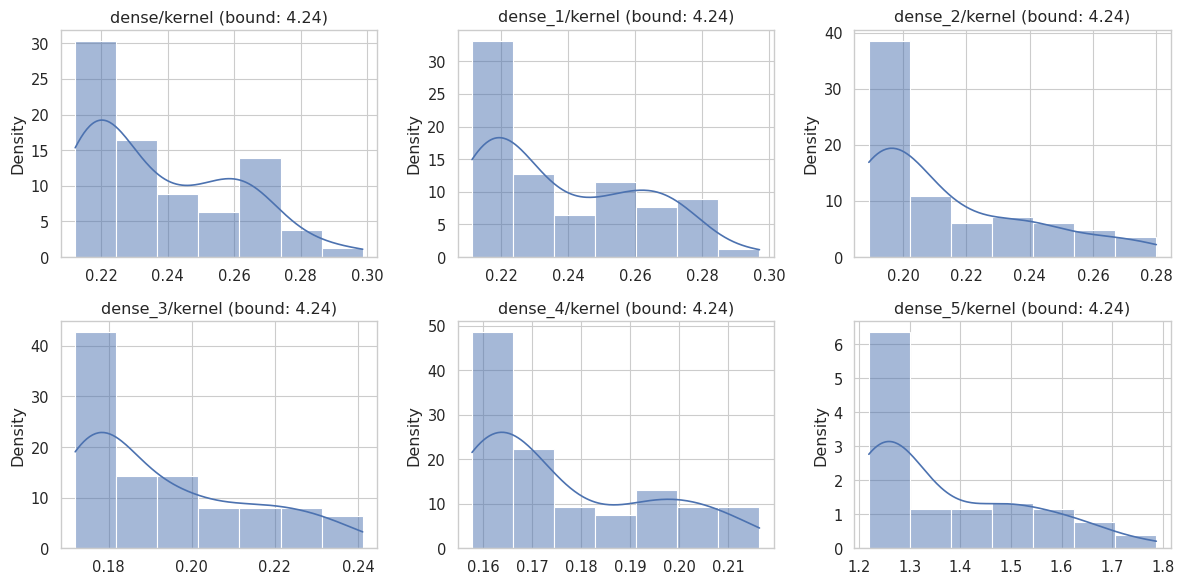

In [3]:
import math

def plot_hist_norms(df, bounds, key, ax):
  hist = df[key].iloc[0]
  count = hist['packedBins']['count']
  start = hist['packedBins']['min']
  size = hist['packedBins']['size']
  bins = [start + i * size for i in range(count)]
  indices = hist['values']
  values = [bins[i] for i in indices]
  sns.histplot(values, kde=True, ax=ax, stat='density')
  bound = bounds[key].iloc[0]
  title = key + f' (bound: {bound:.2f})'
  ax.set_title(title)

def plot_histograms_norms(df, bounds):
  plt.figure(figsize=(12, 6))
  sns.set(style="whitegrid")
  sns.set_context("paper", font_scale=1.2)
  nrows = math.ceil(len(df.columns) / 3)
  fig, axes = plt.subplots(nrows, 3, figsize=(12, 6))
  axes = axes.flatten()
  keys = sorted(df_ratios.columns)
  for key, ax in zip(keys, axes):
    plot_hist_norms(df=df, bounds=bounds, key=key, ax=ax)
  plt.tight_layout()

plot_histograms_norms(df_norms, df_bounds)

<Figure size 3600x1800 with 0 Axes>

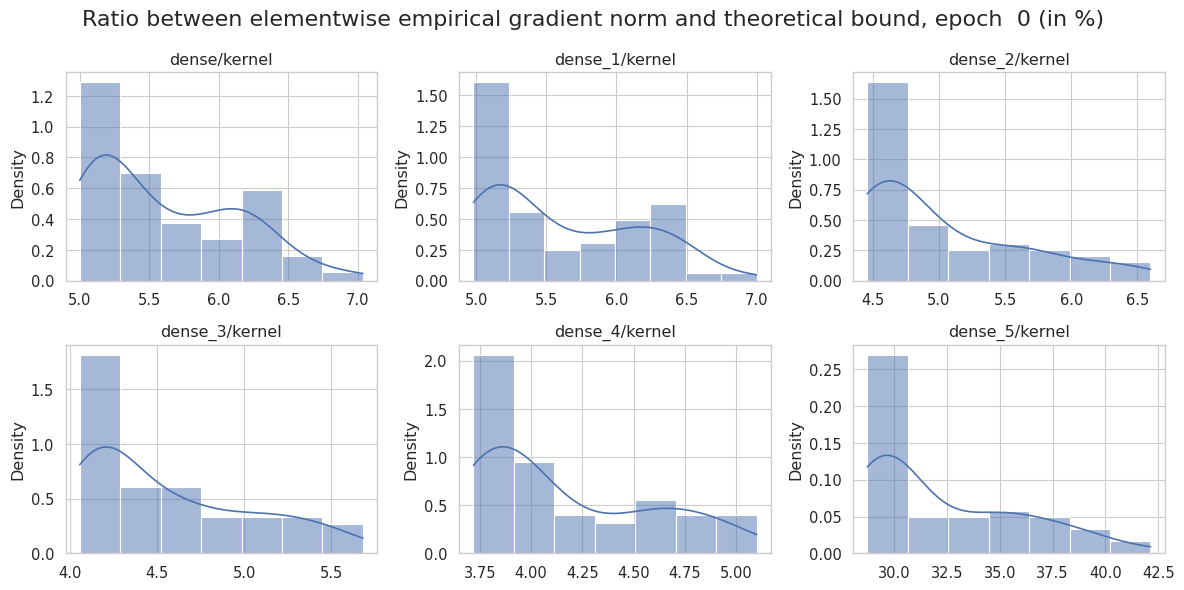

In [4]:
def plot_hist_ratios(df, key, ax, epoch):
  hist = df[key].iloc[epoch]
  count = hist['packedBins']['count']
  start = hist['packedBins']['min']
  size = hist['packedBins']['size']
  bins = [start + i * size for i in range(count)]
  indices = hist['values']
  values = [bins[i] for i in indices]
  values = [v * 100 for v in values]
  sns.histplot(values, kde=True, ax=ax, stat='density')
  ax.set_title(key)
  # ax.set_xlim(0, None)

def plot_histograms_ratios(df, epoch):
  plt.figure(figsize=(12, 6), dpi=300)
  sns.set(style="whitegrid")
  sns.set_context("paper", font_scale=1.2)
  nrows = math.ceil(len(df.columns) / 3)
  fig, axes = plt.subplots(nrows, 3, figsize=(12, 6))
  axes = axes.flatten()
  keys = sorted(df_ratios.columns)
  for key, ax in zip(keys, axes):
    plot_hist_ratios(df=df, key=key, ax=ax, epoch=epoch)
  title = f'Ratio between elementwise empirical gradient norm and theoretical bound, epoch {epoch:2d} (in %)'
  fig.suptitle(title, fontsize=16)
  plt.tight_layout()
  plt.savefig(f'histogram_ratios_epoch_{epoch}.png')

plot_histograms_ratios(df_ratios, 0)

<Figure size 3600x1800 with 0 Axes>

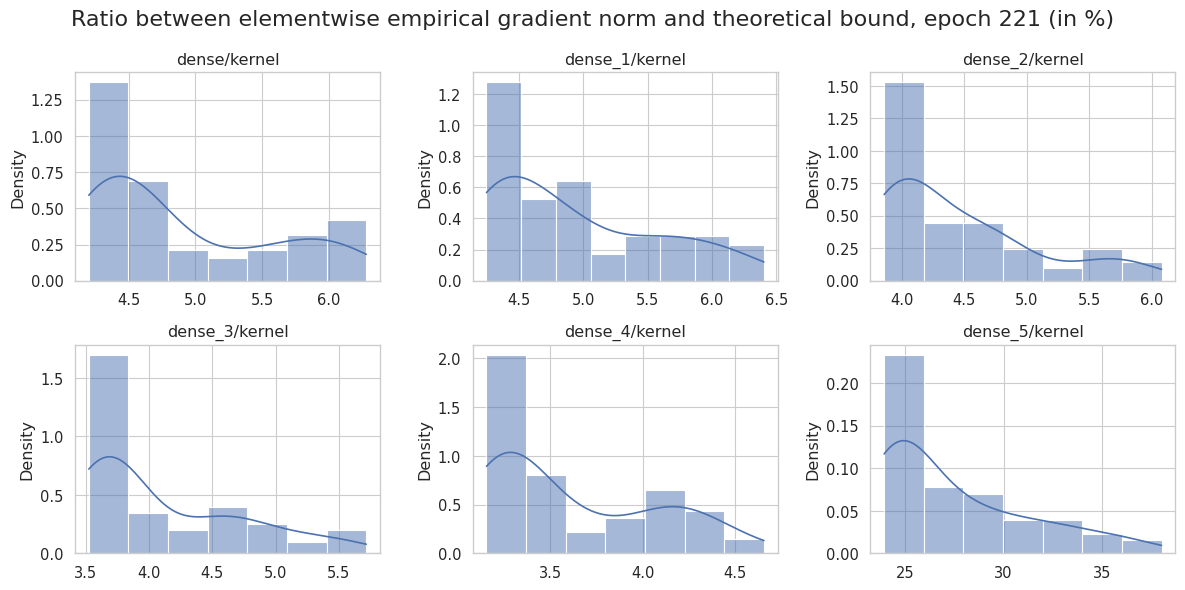

In [6]:
epoch = run.summary_metrics["epoch"]
plot_histograms_ratios(df_ratios, epoch-2)